Only Demo data needed

In [1]:
### import media from NHANES 2021-2013 into folder
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
### below packages were necessary for running at work ignore below packages if on private PC
from google.colab import drive
import os

Question 5: Experimental Q
---
Is there a correlation with age and marital status?


Data : DEMO data

RIDAGEYR - Age

| Code |  Value | Count |
|---|---|---|
| 0 - 79| ages between 0 to 79 | 11408 |
| 80 | individuals of 80 or older | 525 |

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

In [26]:
import pandas as pd
demo_df = pd.read_sas('DEMO_L.xpt')
print(demo_df.head())

       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1  130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2  130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3  130381.0      12.0       2.0       2.0       5.0       NaN       5.0   
4  130382.0      12.0       2.0       1.0       2.0       NaN       3.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHRGND  DMDHRAGZ  DMDHREDZ  DMDHRMAZ  \
0       6.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
1       3.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
2       2.0       1.0       NaN  ...       NaN       NaN       NaN       NaN   
3       7.0       1.0      71.0  ...       2.0       2.0       2.0       3.0   
4       3.0       2.0      34.0  ...       2.0       2.0       3.0       1.0   

   DMDHSEDZ      WTINT2YR      WTMEC2YR  SDMVSTRA  SDMVPSU  INDFMPIR

In [28]:
df = demo_df[['SEQN','RIDAGEYR','DMDMARTZ']]
print(df)

           SEQN  RIDAGEYR  DMDMARTZ
0      130378.0      43.0       1.0
1      130379.0      66.0       1.0
2      130380.0      44.0       1.0
3      130381.0       5.0       NaN
4      130382.0       2.0       NaN
...         ...       ...       ...
11928  142306.0       9.0       NaN
11929  142307.0      49.0       3.0
11930  142308.0      50.0       1.0
11931  142309.0      40.0       2.0
11932  142310.0      80.0       1.0

[11933 rows x 3 columns]


In [29]:
q5_df = df.dropna(subset=['RIDAGEYR', 'DMDMARTZ'])
print(q5_df.head())
print(q5_df.value_counts())

       SEQN  RIDAGEYR  DMDMARTZ
0  130378.0      43.0       1.0
1  130379.0      66.0       1.0
2  130380.0      44.0       1.0
6  130384.0      43.0       3.0
7  130385.0      65.0       1.0
SEQN      RIDAGEYR  DMDMARTZ
142289.0  68.0      1.0         1
142288.0  54.0      1.0         1
142287.0  70.0      1.0         1
142286.0  70.0      1.0         1
142285.0  60.0      1.0         1
                               ..
130385.0  65.0      1.0         1
130384.0  43.0      3.0         1
130380.0  44.0      1.0         1
130379.0  66.0      1.0         1
130378.0  43.0      1.0         1
Name: count, Length: 7792, dtype: int64


In [30]:
# Remove null/missing values 0.0 and NaN (missing) from AGE !!!! may not be necessary
#q5_p1_df_filtered = q5_df[~q5_df['RIDAGEYR'].isin([0.0])].dropna(subset=['RIDAGEYR'])
#print(q5_p1_df_filtered.head())
# print(q4_p1_df_filtered['PAD680'].value_counts())
#### cleaning age category is not necessary since there is no missing values

In [31]:
# Remove null/missing values 77, 99, and NaN (missing) from Marriage stat !!!!
q5_df_filtered = q5_df[~q5_df['DMDMARTZ'].isin([0.0, 77, 99])].dropna(subset=['DMDMARTZ'])
print(q5_df_filtered.head())
# print(q4_p1_df_filtered['PAD680'].value_counts())

       SEQN  RIDAGEYR  DMDMARTZ
0  130378.0      43.0       1.0
1  130379.0      66.0       1.0
2  130380.0      44.0       1.0
6  130384.0      43.0       3.0
7  130385.0      65.0       1.0


In [32]:
q5_true_df = q5_df_filtered.dropna(subset=['DMDMARTZ', 'RIDAGEYR']).copy()

In [33]:
y = q5_true_df['DMDMARTZ']
X = q5_true_df[['RIDAGEYR']]
# Add a constant to the independent variable matrix (for the intercept)
X = sm.add_constant(X)

In [34]:
model_5 = sm.OLS(y, X).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:               DMDMARTZ   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     439.9
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           4.71e-95
Time:                        15:43:14   Log-Likelihood:                -9069.2
No. Observations:                7783   AIC:                         1.814e+04
Df Residuals:                    7781   BIC:                         1.816e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2420      0.028     79.159      0.0

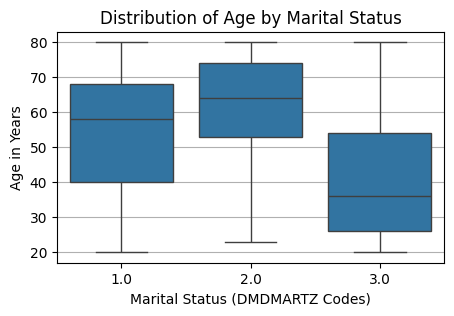

In [10]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=q5_true_df, x='DMDMARTZ', y='RIDAGEYR')
plt.title('Distribution of Age by Marital Status')
plt.xlabel('Marital Status (DMDMARTZ Codes)')
plt.ylabel('Age in Years')
plt.grid(axis='y')
plt.show()

Recategorized data
DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

Changed to

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married or had Married | 6158 |
|3|Never Married|1625|

In [11]:
#### USE THIS FOR BOX PLOT
def recategorize_marital_status_new(marital_code):
    if marital_code in [1.0, 2.0]:
        return 'Had Married or is Married'
    elif marital_code == 3.0:
        return 'Never Married'
    else:
        return 'Unknown' # Handle any other potential values

q5_df_filtered['DMDMARTZ_recat_new'] = q5_df_filtered['DMDMARTZ'].apply(recategorize_marital_status_new)

print(q5_df_filtered[['DMDMARTZ', 'DMDMARTZ_recat_new']].head())
print(q5_df_filtered['DMDMARTZ_recat_new'].value_counts())

   DMDMARTZ         DMDMARTZ_recat_new
0       1.0  Had Married or is Married
1       1.0  Had Married or is Married
2       1.0  Had Married or is Married
6       3.0              Never Married
7       1.0  Had Married or is Married
DMDMARTZ_recat_new
Had Married or is Married    6158
Never Married                1625
Name: count, dtype: int64


In [24]:
# Perform regression test with recategorized marital status and age
y_recat = q5_df_filtered['DMDMARTZ_recat_new']
X_recat = q5_df_filtered[['RIDAGEYR']]

# Convert categorical variable to dummy variables for regression
X_recat = pd.get_dummies(X_recat, columns=['RIDAGEYR'], drop_first=True)

# Add a constant to the independent variable matrix (for the intercept)
X_recat = sm.add_constant(X_recat, has_constant='add')

# Convert the target variable to numerical (e.g., 0 for Never Married, 1 for Had Married or is Married)
y_recat_numeric = q5_df_filtered['DMDMARTZ_recat_new'].apply(lambda x: 1 if x == 'Had Married or is Married' else 0)

# Perform OLS regression
model_recat = sm.OLS(y_recat_numeric, X_recat).fit()
print(model_recat.summary())

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

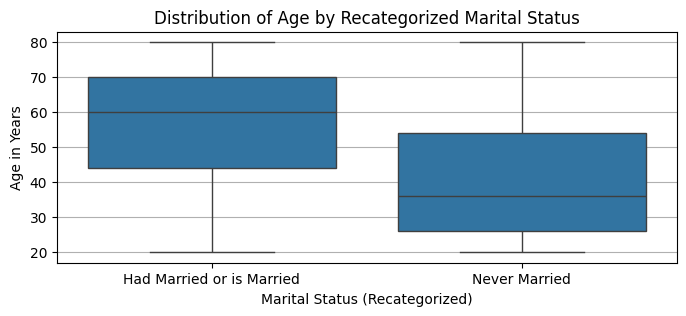

In [16]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=q5_df_filtered, x='DMDMARTZ_recat_new', y='RIDAGEYR')
plt.title('Distribution of Age by Recategorized Marital Status')
plt.xlabel('Marital Status (Recategorized)')
plt.ylabel('Age in Years')
plt.grid(axis='y')
plt.show()

Marriage status does have correlation with age based on findings. Nevermarried group seems to have the youngest group which chronilogically makes sense. However Group 2, the divorced-widowed group, has the oldest average due to the requirement that they be part of group 1 first then

IGNORE BELOW THIS CELL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
### note this was necessary incase of running at work

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xpt_files_directory = '/content/drive/MyDrive/AHI - MS /507 /assign3-data'

In [ ]:
all_dataframes = []

In [ ]:
xpt_files = [f for f in os.listdir("/content/drive/MyDrive/AHI - MS /507 /assign3-data") if f.endswith('.xpt')]

In [27]:
import pandas as pd
combined_df = pd.DataFrame()

In [ ]:
# Display the first few rows of the combined DataFrame
display(combined_df.head())

/usr/local/lib/python3.12/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.12/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,...,WHD020,WHD050,WHQ070,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680
0,130378.0,R,4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,R,4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130380.0,R,4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130386.0,R,4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130387.0,R,4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
